<a href="https://colab.research.google.com/github/soundaryaKammar05/2KE23CS416/blob/main/Lab_6_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def locally_weighted_regression(X, Y, tau, x_query):
    # Compute weights as a 1D array
    weights = np.exp(-np.sum((X - x_query)**2, axis=1) / (2 * tau**2))

    # Add intercept term to X
    X_augmented = np.c_[np.ones(X.shape[0]), X]
    x_query_augmented = np.array([1, x_query[0]])

    # Compute weighted normal equation
    W = np.diag(weights)  # Create a diagonal matrix for weights
    X_transpose_W = X_augmented.T @ W
    theta = np.linalg.pinv(X_transpose_W @ X_augmented) @ X_transpose_W @ Y
    return x_query_augmented @ theta

In [ ]:
db = pd.read_csv(r"C:\Users\vinay\Downloads\archive\housing.csv")
db.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


LWR MSE: 11086696547.09
KNN MSE: 16114298389.19


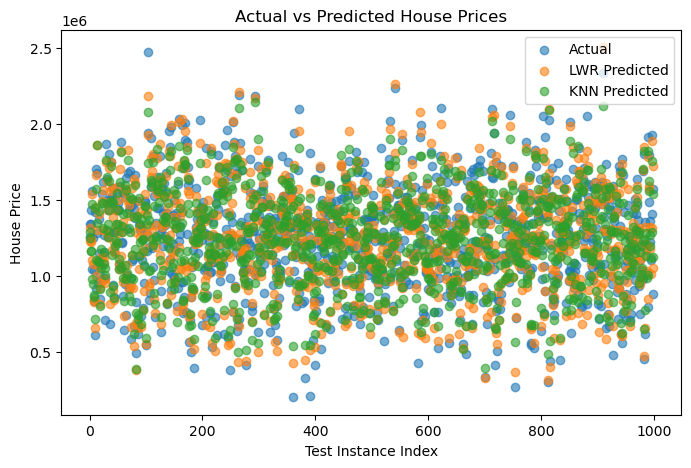

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\vinay\Downloads\archive\housing.csv")  # replace with actual filename

# Drop the 'Address' column as it is not numeric
df = df.drop(columns=['Address'])

# Define features and target
features = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
            'Avg. Area Number of Bedrooms', 'Area Population']
target = 'Price'

X = df[features].values
Y = df[target].values

# Normalize features for LWR (important for Euclidean distance)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Locally Weighted Regression function
def locally_weighted_regression(X, Y, tau, x_query):
    weights = np.exp(-np.sum((X - x_query)**2, axis=1) / (2 * tau**2))
    X_augmented = np.c_[np.ones(X.shape[0]), X]
    x_query_augmented = np.r_[1, x_query]
    W = np.diag(weights)
    theta = np.linalg.pinv(X_augmented.T @ W @ X_augmented) @ (X_augmented.T @ W @ Y)
    return x_query_augmented @ theta

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Predict using LWR for each test point (slow for large data)
tau = 0.5
lwr_predictions = [locally_weighted_regression(X_train, y_train, tau, x) for x in X_test]
lwr_mse = mean_squared_error(y_test, lwr_predictions)

# Predict using KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_predictions)

# Print results
print(f"LWR MSE: {lwr_mse:.2f}")
print(f"KNN MSE: {knn_mse:.2f}")

# Optional: Plot actual vs predicted for LWR
plt.figure(figsize=(8,5))
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.6)
plt.scatter(range(len(y_test)), lwr_predictions, label='LWR Predicted', alpha=0.6)
plt.scatter(range(len(y_test)), knn_predictions, label='KNN Predicted', alpha=0.6)
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Test Instance Index')
plt.ylabel('House Price')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


🏠 Housing Dataset:
  - LWR MSE: 11696155368.77
  - KNN MSE: 17044697490.20

🩺 Diabetes Dataset:
  - LWR MSE: 17332.46
  - KNN MSE: 4243.42


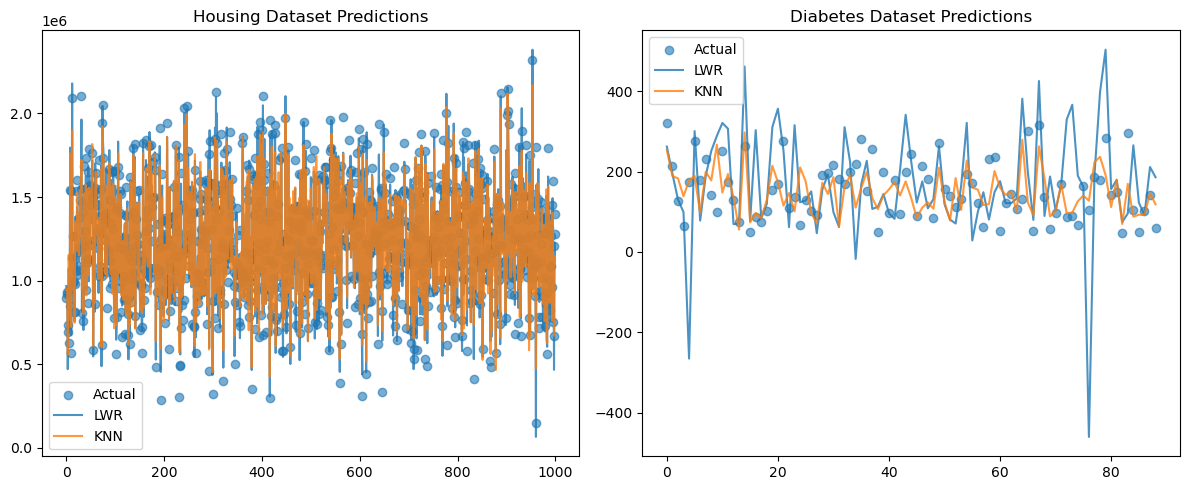

In [ ]:
def locally_weighted_regression(X, Y, tau, x_query):
    weights = np.exp(-np.sum((X - x_query) ** 2, axis=1) / (2 * tau ** 2))
    X_augmented = np.c_[np.ones(X.shape[0]), X]
    x_query_augmented = np.r_[1, x_query]
    W = np.diag(weights)
    theta = np.linalg.pinv(X_augmented.T @ W @ X_augmented) @ (X_augmented.T @ W @ Y)
    return x_query_augmented @ theta
# Load housing data
housing_df = pd.read_csv(r"C:\Users\vinay\Downloads\archive\housing.csv")
housing_df = housing_df.drop(columns=['Address'])

# Select features + target
housing_features = ['Avg. Area Income', 'Avg. Area House Age',
                    'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
                    'Area Population']
housing_target = 'Price'

X_housing = housing_df[housing_features].values
Y_housing = housing_df[housing_target].values

# Normalize features
scaler_housing = StandardScaler()
X_housing_scaled = scaler_housing.fit_transform(X_housing)

# Split
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_housing_scaled, Y_housing, test_size=0.2, random_state=0)

# Predict using LWR
tau = 0.5
y_pred_lwr_h = [locally_weighted_regression(X_train_h, y_train_h, tau, x) for x in X_test_h]
lwr_mse_h = mean_squared_error(y_test_h, y_pred_lwr_h)

# Predict using KNN
knn_h = KNeighborsRegressor(n_neighbors=5)
knn_h.fit(X_train_h, y_train_h)
y_pred_knn_h = knn_h.predict(X_test_h)
knn_mse_h = mean_squared_error(y_test_h, y_pred_knn_h)
# Load diabetes dataset
diabetes = load_diabetes()
X_diabetes = diabetes.data
Y_diabetes = diabetes.target

# Normalize features
scaler_d = StandardScaler()
X_diabetes_scaled = scaler_d.fit_transform(X_diabetes)

# Split
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_diabetes_scaled, Y_diabetes, test_size=0.2, random_state=0)

# LWR
tau = 0.5
y_pred_lwr_d = [locally_weighted_regression(X_train_d, y_train_d, tau, x) for x in X_test_d]
lwr_mse_d = mean_squared_error(y_test_d, y_pred_lwr_d)

# KNN
knn_d = KNeighborsRegressor(n_neighbors=5)
knn_d.fit(X_train_d, y_train_d)
y_pred_knn_d = knn_d.predict(X_test_d)
knn_mse_d = mean_squared_error(y_test_d, y_pred_knn_d)
print("🏠 Housing Dataset:")
print(f"  - LWR MSE: {lwr_mse_h:.2f}")
print(f"  - KNN MSE: {knn_mse_h:.2f}\n")

print("🩺 Diabetes Dataset:")
print(f"  - LWR MSE: {lwr_mse_d:.2f}")
print(f"  - KNN MSE: {knn_mse_d:.2f}")
plt.figure(figsize=(12, 5))

# Housing
plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test_h)), y_test_h, label='Actual', alpha=0.6)
plt.plot(y_pred_lwr_h, label='LWR', alpha=0.8)
plt.plot(y_pred_knn_h, label='KNN', alpha=0.8)
plt.title("Housing Dataset Predictions")
plt.legend()

# Diabetes
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test_d)), y_test_d, label='Actual', alpha=0.6)
plt.plot(y_pred_lwr_d, label='LWR', alpha=0.8)
plt.plot(y_pred_knn_d, label='KNN', alpha=0.8)
plt.title("Diabetes Dataset Predictions")
plt.legend()

plt.tight_layout()
plt.show()




Activity to complete:
1. Consider two more features and implement the algorithm
2. Implement the same for Diabetes dataset available in sklearn.datasets
3. Compare KNN regression and Local weighted regression (LWR) algorithm considering multiple features for both housing dataset and Diabetes dataset.